<a href="https://colab.research.google.com/github/shagufta24/music-genre-recognition/blob/main/audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification of Audio Features
- Dimensionality Reduction
- Classification algorithms

## Initialization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Upload features dataset csv
from google.colab import files

uploaded = files.upload()

Saving Features_of_audio.csv to Features_of_audio.csv


In [ ]:
df = pd.read_csv('Features_of_audio.csv')
df

,name,tempo,beats,ae,rms,zcr,ber,spec_cent,bw,spec_roll,mfcc
0,rock.00000.wav,123.046875,53,0.368138,0.127919,0.090222,inf,1912.333849,2061.313353,4071.873754,-116.604362
1,rock.00001.wav,151.999081,66,0.482413,0.179366,0.054956,inf,1444.643769,1784.472604,3051.403101,-111.223877
2,rock.00002.wav,107.666016,51,0.468281,0.144367,0.076826,inf,1775.507572,1928.016864,3732.538451,-120.403229
3,rock.00003.wav,95.703125,46,0.373508,0.149116,0.043093,inf,1295.916368,1805.570386,2708.637140,-156.540115
4,rock.00004.wav,103.359375,49,0.475009,0.207818,0.041075,inf,1249.342687,1769.862585,2670.833296,-127.948868
...,...,...,...,...,...,...,...,...,...,...,...
994,disco.00095.wav,123.046875,60,0.268842,0.095395,0.117993,inf,2330.465799,2201.648800,4731.242749,-159.889908
995,disco.00096.wav,103.359375,49,0.267134,0.089779,0.134328,inf,2338.206501,2129.526144,4733.807416,-133.819321
996,disco.00097.wav,129.199219,64,0.295305,0.103931,0.120430,inf,2646.360176,2610.113275,5908.491109,-116.921860
997,disco.00098.wav,123.046875,60,0.358985,0.119896,0.112548,inf,2275.306654,2356.470811,5050.560334,-91.576141


In [ ]:
# # Creating label column and dropping name
# import re
# def get_label(name):
#     return re.search('([a-zA-Z]+)', name).group()
# df['label'] = df['name'].apply(get_label)

# df = df.drop(columns=['name'])

In [ ]:
df = df.drop(columns=['ber'])
genre_list = generes = [{0:'rock',1:'reggae',2:'metal',3:'pop',4:'classical',5:'hiphop',6:'jazz',7:'country',8:'blues',9:'disco'}]
code = 0
for index,types in genre_list[0].items():
  regexp = types +"\.[0-9]*\.(wav)"
  df = df.replace(to_replace = regexp,value = index,regex=True)
df

,name,tempo,beats,ae,rms,zcr,spec_cent,bw,spec_roll,mfcc
0,0,123.046875,53,0.368138,0.127919,0.090222,1912.333849,2061.313353,4071.873754,-116.604362
1,0,151.999081,66,0.482413,0.179366,0.054956,1444.643769,1784.472604,3051.403101,-111.223877
2,0,107.666016,51,0.468281,0.144367,0.076826,1775.507572,1928.016864,3732.538451,-120.403229
3,0,95.703125,46,0.373508,0.149116,0.043093,1295.916368,1805.570386,2708.637140,-156.540115
4,0,103.359375,49,0.475009,0.207818,0.041075,1249.342687,1769.862585,2670.833296,-127.948868
...,...,...,...,...,...,...,...,...,...,...
994,9,123.046875,60,0.268842,0.095395,0.117993,2330.465799,2201.648800,4731.242749,-159.889908
995,9,103.359375,49,0.267134,0.089779,0.134328,2338.206501,2129.526144,4733.807416,-133.819321
996,9,129.199219,64,0.295305,0.103931,0.120430,2646.360176,2610.113275,5908.491109,-116.921860
997,9,123.046875,60,0.358985,0.119896,0.112548,2275.306654,2356.470811,5050.560334,-91.576141


In [ ]:
# # Dropping BER for now
# df = df.drop(columns=['ber'])
# df

In [ ]:
y = df.iloc[:,0].values

df = df.drop(columns=['name'])
X = df.to_numpy()
print(y[0])

0


## Pre-processing

In [ ]:
# # Dividing the values into the features and labels
# X = df.iloc[:,:9].values
# y = df.iloc[:,-1:].values

tempo        float64
beats          int64
ae           float64
rms          float64
zcr          float64
spec_cent    float64
bw           float64
spec_roll    float64
mfcc         float64
dtype: object

In [ ]:
# Label encoder
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
le = preprocessing.LabelEncoder()
le.fit(y)
y_encoded = le.transform(y)
print(y_encoded[300])

7


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
# Normalisizing data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_use = X_std
X_std.shape
print(np.std(X_std))

1.0


## Dimensionality Reduction

### PCA

In [ ]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

In [ ]:
X_std.shape, X_pca.shape

((999, 9), (999, 2))

In [ ]:
# Variance ratios
pca.explained_variance_ratio_

array([0.57789564, 0.21900641])

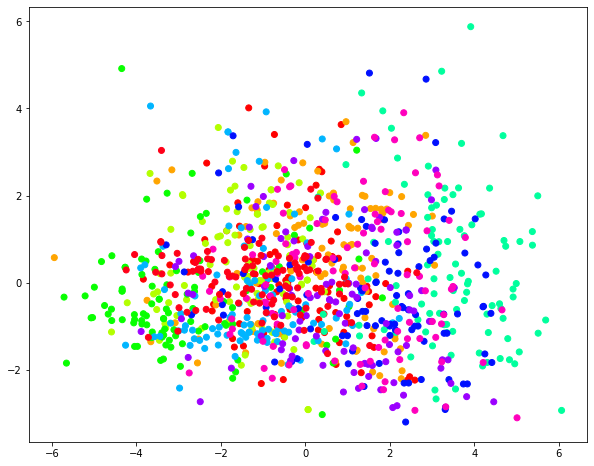

In [ ]:
# Plotting new dimensions
plt.figure(figsize=(10,8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='hsv')

In [ ]:
# Most important features
n_pcs= pca.components_.shape[0]
# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = ['tempo', 'beats', 'ae', 'rms', 'zcr', 'spec_cent', 'bw', 'spec_roll', 'mfcc']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
imp_features = pd.DataFrame(sorted(dic.items()))
imp_features

,0,1
0,PC1,spec_roll
1,PC2,tempo


### SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components = 2)
svd.fit(X_std)
X_svd = svd.transform(X_std)

In [ ]:
X_std.shape, X_svd.shape

((999, 9), (999, 2))

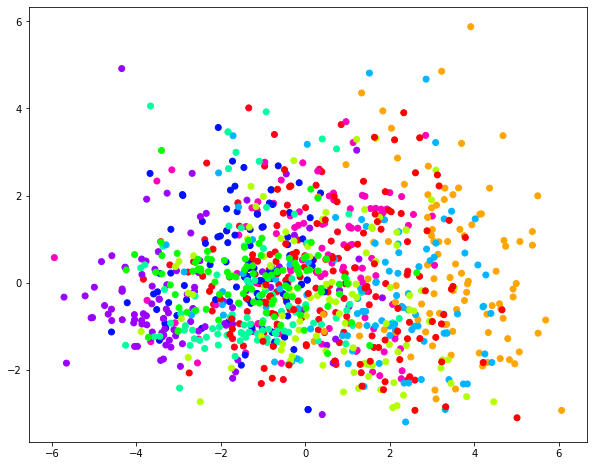

In [ ]:
# Plotting new dimensions
plt.figure(figsize=(10,8))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=y_encoded, cmap="hsv")

### LDA

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
X_lda = lda.fit_transform(X_std, y_encoded)

In [ ]:

X_std.shape, X_lda.shape

((999, 9), (999, 1))

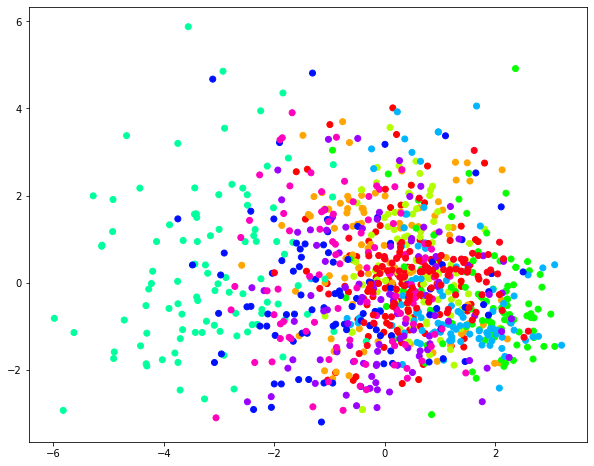

In [ ]:
# Plotting new dimensions
plt.figure(figsize=(10,8))
plt.scatter(X_lda[:, 0], X_svd[:, 1], c=y, cmap="hsv")

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2,perplexity=26,n_iter=1000,random_state=22132).fit_transform(X_use)
# X_tsne.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
color_dict =[{0:'rock',1:'reggae',2:'metal',3:'pop',4:'classical',5:'hiphop',6:'jazz',7:'country',8:'blues',9:'disco'}]

tsne_df = pd.DataFrame(columns=["Comp1", "Comp2","Label"])

for i in range(len(X_tsne)):
    
    dicti = dict()
    
    dicti["Comp1"] = X_tsne[i, 0]
    dicti["Comp2"] = X_tsne[i, 1]
    #dicti["Comp3"] = music_proj[i, 2]

    key = y[i]
    dicti["Label"] = color_dict[0].get(key)    
    tsne_df = tsne_df.append(dicti, ignore_index = True)
tsne_df

,Comp1,Comp2,Label
0,10.829416,-3.021093,rock
1,15.561498,23.334118,rock
2,0.064747,-21.266041,rock
3,16.738932,-19.145569,rock
4,5.550292,-25.620102,rock
...,...,...,...
994,1.077698,11.835705,disco
995,-4.215588,-2.367383,disco
996,-10.029196,13.926884,disco
997,-2.067136,9.044986,disco


,label,comp1,comp2
0,0,23.908804,-5.989867
1,0,29.845179,-10.915905
2,0,18.247606,-3.100606
3,0,20.505665,-0.050610
4,0,20.549047,-1.344885
...,...,...,...
994,9,-21.399677,10.265626
995,9,-24.224699,7.374480
996,9,-21.858593,3.211834
997,9,-19.459307,7.879021


[Text(0.5, 1.0, 'T-SNE projection')]

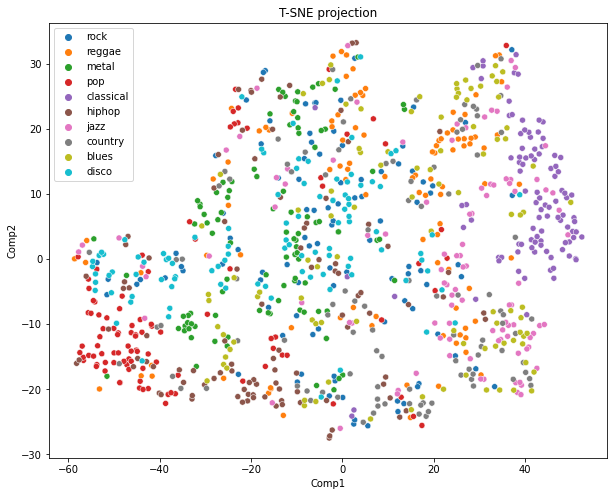

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x="Comp1", y="Comp2", hue=tsne_df.Label.tolist(),
                data=tsne_df).set(title="T-SNE projection")

In [ ]:
import plotly.graph_objects as go
import plotly.express as px


for_x = tsne_df.Comp1.tolist()
for_y = tsne_df.Comp2.tolist()
for_label = tsne_df.Label.tolist()
for_hover = tsne_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="T-SNE",
                 color_discrete_map={"rock":"blue","reggae":"green","metal":"red","pop":"cyan","classical":"gray","hiphop":"yellow","jazz":"black","country":"white","blues":"orange","disco":"pink"}, width=800, height=600)

fig.update_layout(
    xaxis=dict(title = 'Comp-1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'Comp-2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

## Logistic Regression

### Baseline

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [ ]:
model = LogisticRegression(class_weight="balanced")
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
scores = cross_val_score(model, X_std, y_encoded, scoring="accuracy", cv=cv, n_jobs=-1)

In [ ]:
# Accuracy and Std dev
np.mean(scores), np.std(scores)

(0.451429648241206, 0.0215606071941689)

### PCA

In [ ]:
# Logistic Regression with PCA
from sklearn.pipeline import Pipeline
steps = [
    ("PCA", PCA(n_components=2)),
    ("model", LogisticRegression(class_weight="balanced")),
]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
scores = cross_val_score(model, X_std, y_encoded, scoring="accuracy", cv=cv, n_jobs=-1)
# Accuracy and Std dev
np.mean(scores), np.std(scores)

(0.32979396984924614, 0.03280943505780622)

### SVD

In [ ]:
# Logistic Regression with SVD
from sklearn.pipeline import Pipeline
steps = [
    ("SVD", TruncatedSVD(n_components=2)),
    ("model", LogisticRegression(class_weight="balanced")),
]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
scores = cross_val_score(model, X_std, y_encoded, scoring="accuracy", cv=cv, n_jobs=-1)
# Accuracy and Std dev
np.mean(scores), np.std(scores)

(0.32979396984924614, 0.03280943505780622)

### LDA

In [ ]:
# Logistic Regression with LDA
from sklearn.pipeline import Pipeline
steps = [
    ("LDA", LinearDiscriminantAnalysis(n_components=1)),
    ("model", LogisticRegression(class_weight="balanced")),
]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
scores = cross_val_score(model, X_std, y_encoded, scoring="accuracy", cv=cv, n_jobs=-1)
# Accuracy and Std dev
np.mean(scores), np.std(scores)

(0.2827412060301508, 0.033049049104718474)

### t-SNE

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.datasets import make_classification

class TestTSNE(BaseEstimator, TransformerMixin):
    def __init__(self,n_components,perplexity,random_state=None,method='exact'):
        self.n_components = n_components
        self.perplexity = perplexity
        self.method = method
        self.random_state = random_state

    def fit(self, X, y = None):
        ts = TSNE(n_components = self.n_components,
        method = self.method, random_state = self.random_state)
        self.X_tsne = ts.fit_transform(X)
        return self

    def transform(self, X, y = None):
        return X

In [ ]:
# Logistic Regression with t_SNE
from sklearn.pipeline import Pipeline
steps = [
    ("TSNE", TestTSNE(n_components=2,perplexity=50)),
    ("model", LogisticRegression(class_weight="balanced")),
]
model = Pipeline(steps=steps)

In [ ]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=0)
scores = cross_val_score(model, X_std, y, scoring="accuracy", cv=cv, n_jobs=-1)
# Accuracy and Std dev
np.mean(scores), np.std(scores)

(0.451429648241206, 0.0215606071941689)

## KNN